In [ ]:
# data manipulation
import pandas as pd
import numpy as np

# viaulization 
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf 
import plotly.express as px

# from ipynb.fs.full.fintech_scraping import name_convert

### Load Nasdaq Fintech companies

In [ ]:
nasdaq_fintech = pd.read_csv('nasdaq_fintech.csv')
nasdaq_fintech

,Fintech_Comp_Name,Ticker
0,PayPal,PYPL
1,Square,SQ
2,Visa,V
3,MasterCard,MA
4,Equifax,EFX
...,...,...
59,BofI Federal Bank,bofi
60,EverBank Financial,EVERPRA
61,EVERTEC,EVTC
62,SEI Investments,SEIC


### Load companies IPO data

In [ ]:
IPO = pd.read_excel('IPO-age.xlsx', engine='openpyxl')
IPO = IPO.iloc[:, :11]
IPO.head()

,CUSIP,offer date,name of IPO,Ticker,VC,Rollup,PERM,Dual,Internet,post-issue shares,Founding
0,78088610,19750130,ROYSTER,NaN,0,0,67898,0,0,.,1901
1,92212610,19750609,VARCO,VRC,0,0,63044,0,0,.,1908
2,21701610,19750610,COORS ADOLPH,TAP,0,0,59248,1,0,34159000,1901
3,49348410,19750715,KEYSTONE FOODS CORP,NaN,0,0,61989,0,0,.,1965
4,10564710,19750826,C. F. BRAUN,NaN,0,0,58579,0,0,.,1909


### Combine datasets
Inner join Nasdaq fintech companies with IPO data on `Ticker` column. Named the resulting dataframe `nasdaq_fintech_comp`

In [ ]:
nasdaq_fintech_comp = pd.merge(nasdaq_fintech, IPO, how = 'inner',on=['Ticker']).drop_duplicates()
nasdaq_fintech_comp

,Fintech_Comp_Name,Ticker,CUSIP,offer date,name of IPO,VC,Rollup,PERM,Dual,Internet,post-issue shares,Founding
0,PayPal,PYPL,70450810,20020214,Paypal Inc,1,0,89311,0,1,.,1998
2,Square,SQ,852234103,20151119,Square Inc,1,0,15826,1,1,327944711,2009
4,Visa,V,92826C839,20080319,Visa Inc,0,0,92611,1,0,805822979,1970
6,MasterCard,MA,57636Q104,20060524,MasterCard Inc,0,0,91233,1,0,139583407,1966
8,Fiserv,FISV,337738108,19860925,FIserv,0,0,10696,0,0,.,1984
10,First Data,FDC,319963104,19920409,First Data,1,0,77546,0,0,.,1978
11,First Data,FDC,32008D106,20151015,First Data Corp,0,0,15703,1,0,879030067,1989
14,CBOE,CBOE,12503M10,20100614,CBOE Holdings Inc,0,0,93429,0,0,.,1973
16,Broadridge,BR,122014103,19880707,Burlington Resources,0,0,75333,0,0,.,1900
18,IHS Markit,INFO,45664510,19830512,"INFO DESIGNS, INC.",0,0,44071,0,0,.,1980


In [ ]:
nasdaq_fintech_comp['offer date'] = nasdaq_fintech_comp['offer date'].astype('str')
nasdaq_fintech_comp['offer date'] = pd.to_datetime(nasdaq_fintech_comp['offer date'])
nasdaq_fintech_comp['offer date'] = nasdaq_fintech_comp['offer date'].apply(lambda x: x.strftime('%Y-%m-%d'))
nasdaq_fintech_comp.head()

,Fintech_Comp_Name,Ticker,CUSIP,offer date,name of IPO,VC,Rollup,PERM,Dual,Internet,post-issue shares,Founding
0,PayPal,PYPL,70450810,2002-02-14,Paypal Inc,1,0,89311,0,1,.,1998
2,Square,SQ,852234103,2015-11-19,Square Inc,1,0,15826,1,1,327944711,2009
4,Visa,V,92826C839,2008-03-19,Visa Inc,0,0,92611,1,0,805822979,1970
6,MasterCard,MA,57636Q104,2006-05-24,MasterCard Inc,0,0,91233,1,0,139583407,1966
8,Fiserv,FISV,337738108,1986-09-25,FIserv,0,0,10696,0,0,.,1984


`offer date`

In [ ]:
nasdaq_fintech_comp['offer date'] = pd.to_datetime(nasdaq_fintech_comp['offer date'])
nasdaq_fintech_comp['offer year'] = nasdaq_fintech_comp['offer date'].dt.year
fig = px.box(nasdaq_fintech_comp, x="offer year", points="all")
fig.show()

In [ ]:
nasdaq_fintech_comp[nasdaq_fintech_comp['offer year'] == 2020]

,Fintech_Comp_Name,Ticker,CUSIP,offer date,name of IPO,VC,Rollup,PERM,Dual,Internet,post-issue shares,Founding,offer year,founded_to_IPO
35,Dun & Bradstreet,DNB,26484T106,2020-07-01,Dun & Bradstreet Holding,0,0,19495,0,0,.,1841,2020,179


`Founding`: founding year

In [ ]:
fig = px.box(nasdaq_fintech_comp, x="Founding", points="all")
fig.show()

`founded_to_IPO` time between founded and IPO

In [ ]:
nasdaq_fintech_comp['founded_to_IPO'] = nasdaq_fintech_comp['offer year'] - nasdaq_fintech_comp['Founding']
fig = px.histogram(nasdaq_fintech_comp, x="founded_to_IPO")
fig.show()

In [ ]:
temp = nasdaq_fintech_comp[nasdaq_fintech_comp['founded_to_IPO'] <= 20]
fig = px.histogram(temp, x="founded_to_IPO")
fig.show()

`VC` column (VC is a dummy with 1 for VC and 2 for a subset of VC that I call growth capital)

In [ ]:
temp = nasdaq_fintech_comp['VC'].value_counts().to_frame()
fig = px.bar(temp, x=temp.index, y='VC')
fig.update_xaxes(tickangle=45)

`Dual` column (multiple share class IPOs)

In [ ]:
temp = nasdaq_fintech_comp['Dual'].value_counts().to_frame()
fig = px.bar(temp, x=temp.index, y='Dual')
fig.update_xaxes(tickangle=45)

`Internet` column (Internet is a dummy with 1 if it is an internet-based  company)

In [ ]:
temp = nasdaq_fintech_comp['Internet'].value_counts().to_frame()
fig = px.bar(temp, x=temp.index, y='Internet')
fig.update_xaxes(tickangle=45)

### Load public companies in the financial sector

In [ ]:
public_financial = pd.read_csv('public_fintech.csv')
public_financial.head()

,Company,URL,Company Description,All Investors,Total Funding,Sector,Industry,Sub-Industry,Country,State,...,CUSIP,offer date,name of IPO,VC,Rollup,PERM,Dual,Internet,post-issue shares,Founding
0,AXA Equitable Holdings,NaN,AXA Equitable is the US subsidiary of AXA.,Public,NaN,Financial,Asset/Financial Management,NaN,United States,New York,...,054561105,20180510,Axa Equitable Holdings Inc,0,0,17787,0,0,.,1900
1,Affiliated Managers Group,http://www.amg.com,Affiliated Managers Group (NYSE: AMG) is a glo...,Public,NaN,Financial,Asset/Financial Management,NaN,United States,Massachusetts,...,008252108,19971121,Affiliated Managers Group,2,1,85593,0,0,.,1988
2,Allegiance Bancshares,http://www.allegiancebank.com,Allegiance Bancshares is a Texas corporation a...,Public,NaN,Financial,Retail Banking,NaN,United States,Texas,...,01748H107,20151008,Allegiance Bancshares Inc,0,0,15774,0,0,.,2007
3,Ally Financial,http://www.ally.com,Ally Financial (NYSE: ALLY) is a digital finan...,Public,NaN,Financial,Lending,Consumer,United States,Michigan,...,02005N100,20140410,Ally Financial Inc,0,0,14558,0,0,.,1924
4,Alpine Income Property Trust,http://www.alpinereit.com,Alpine Income Property Trust (NYSE: PINE) is a...,Public,NaN,Financial,Real Estate,REITs,United States,Florida,...,02083X103,20191122,Alpine Income Property Trust,0,0,19037,0,0,.,2010


In [ ]:
public_financial.shape

(137, 34)

In [ ]:
public_financial = public_financial.loc[:,public_financial.isna().mean() <= 0.7]
public_financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              137 non-null    object 
 1   URL                  121 non-null    object 
 2   Company Description  137 non-null    object 
 3   All Investors        137 non-null    object 
 4   Sector               137 non-null    object 
 5   Industry             136 non-null    object 
 6   Sub-Industry         63 non-null     object 
 7   Country              137 non-null    object 
 8   State                137 non-null    object 
 9   City                 137 non-null    object 
 10  Exit Round           137 non-null    object 
 11  Exit Date            137 non-null    object 
 12  Min Valuation        94 non-null     float64
 13  Max Valuation        94 non-null     float64
 14  Ticker               137 non-null    object 
 15  CUSIP                136 non-null    obj

In [ ]:
public_financial[public_financial['Internet'] == 1]

,Company,URL,Company Description,All Investors,Sector,Industry,Sub-Industry,Country,State,City,...,CUSIP,offer date,name of IPO,VC,Rollup,PERM,Dual,Internet,post-issue shares,Founding
25,BofI Holding,http://www.bofiholding.com,BofI Holding is the holding company for BofI F...,Public,Financial,Retail Banking,NaN,United States,California,San Diego,...,05566U108,20050314,BofI Holding Inc,0,0,90634,0,1,.,1900
106,Owl Rock Capital Corporation,NaN,Owl Rock Capital Corporation (NYSE: ORCC) is a...,Public,Financial,Lending,NaN,United States,New York,New York,...,68273G10,19990604,Online Resources & Commun,1,0,86988,0,1,.,1989
129,Store Capital Corp,http://www.storecapital.com,Store Capital Corp is an internally managed ne...,Public,Financial,Real Estate,REITs,United States,Arizona,Scottsdale,...,86211E103,20000629,Storagenetworks Inc,1,0,88378,0,1,.,1998


Check the origin of these public fintech companies

In [ ]:
print(public_financial['Country'].unique())
print(public_financial['Sector'].unique())
print(public_financial['Exit Round'].unique())
print(public_financial['All Investors'].unique())

['United States']
['Financial']
['IPO']
['Public']


In [ ]:
# Drop Country column, since all of these public companies originate from the United States 
public_financial.drop(columns=['Country', 'Sector', 'Exit Round','All Investors'],inplace=True)

#### Geographic breakdown 

In [ ]:
freq = public_financial['State'].value_counts(normalize=True).to_frame().reset_index()
bottom = freq.quantile(q = 0.4)
less_freq = freq[freq <= bottom]
freq.loc[less_freq['State'].notnull(),'index'] = "Other"
temp = freq.groupby('index')['State'].sum().to_frame()
temp.columns = ['Frequency']
temp.sort_values(by=['Frequency'], ascending=False, inplace = True)
fig = px.bar(temp, x=temp.index, y='Frequency')
fig.update_xaxes(tickangle=45)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



In [ ]:
df = public_financial['City'].value_counts().to_frame()
fig = px.bar(df, x=df.index, y='City')
fig.update_xaxes(tickangle=45)

In [ ]:
freq = public_financial['City'].value_counts().to_frame().reset_index()
bottom = freq.quantile(q = 0.4)
less_freq = freq[freq <= bottom]
freq.loc[less_freq['City'].notnull(),'index'] = "Other"
temp = freq.groupby('index')['City'].sum().to_frame()
temp.columns = ['Count']
temp.sort_values(by=['Count'], ascending=False, inplace = True)
fig = px.bar(temp, x=temp.index, y='Count')
fig.update_xaxes(tickangle=45)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



In [ ]:
df = public_financial['Industry'].value_counts().to_frame()
px.bar(df, x=df.index, y='Industry')

In [ ]:
df = public_financial['Sub-Industry'].value_counts().to_frame()
px.bar(df, x=df.index, y='Sub-Industry')

<AxesSubplot:xlabel='Min Valuation', ylabel='Density'>

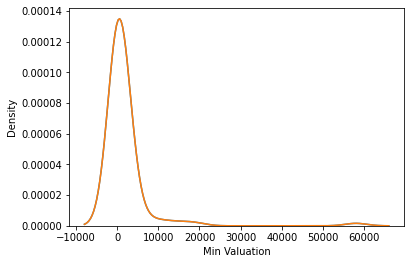

In [ ]:
# min max provide the same information
sns.kdeplot(public_financial['Min Valuation'])
sns.kdeplot(public_financial['Max Valuation'])

In [ ]:
public_financial['offer date'] = public_financial['offer date'].astype('str')
public_financial['offer date'] = pd.to_datetime(public_financial['offer date'])
public_financial['offer date'] = public_financial['offer date'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [ ]:
public_financial['offer date'] = pd.to_datetime(public_financial['offer date'])
public_financial['offer year'] = public_financial['offer date'].dt.year
fig = px.box(public_financial, x="offer year", points="all")
fig.show()

In [ ]:
public_financial[public_financial['Founding'] == -99] = np.nan
fig = px.box(public_financial, x="Founding", points="all")
fig.show()

`founded_to_IPO` time between founded and IPO

In [ ]:
public_financial['founded_to_IPO'] = public_financial['offer year'] - public_financial['Founding']
fig = px.histogram(public_financial, x="founded_to_IPO")
fig.show()

In [ ]:
temp = public_financial[public_financial['founded_to_IPO'] <= 20]
fig = px.histogram(temp, x="founded_to_IPO")
fig.show()

`VC` column (VC is a dummy with 1 for VC and 2 for a subset of VC that I call growth capital)

In [ ]:
temp = public_financial['VC'].value_counts().to_frame()
fig = px.bar(temp, x=temp.index, y='VC')
fig.update_xaxes(tickangle=45)

`Dual` column (multiple share class IPOs)

In [ ]:
temp = public_financial['Dual'].value_counts().to_frame()
fig = px.bar(temp, x=temp.index, y='Dual')
fig.update_xaxes(tickangle=45)

`Internet` column (Internet is a dummy with 1 if it is an internet-based  company)

In [ ]:
temp = public_financial['Internet'].value_counts().to_frame()
fig = px.bar(temp, x=temp.index, y='Internet')
fig.update_xaxes(tickangle=45)

In [ ]:
public_financial[public_financial['Internet'] == 9]

,Company,URL,Company Description,Industry,Sub-Industry,State,City,Exit Date,Min Valuation,Max Valuation,...,name of IPO,VC,Rollup,PERM,Dual,Internet,post-issue shares,Founding,offer year,founded_to_IPO
38,Chimera Investment Corporation,http://www.chimerareit.com,Chimera Investment Corporation invests in resi...,Real Estate,REITs,New York,New York,2007-11-16,554.32,554.32,...,Chimera Inv Corp,0.0,0.0,92385,0,9.0,.,2007.0,2007.0,0.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aaf19c1d-a3b1-4f9b-b674-e32609e59fe1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>